
 ## Natural Language Processing final Project

## Topic Analaysis of Review Data - VOC 
### Reviews Analaysis of the Newly lanched Lenova Mobile in India on Amazon.in 

In [ ]:

import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('K8 Reviews v0.2.csv')
df.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


In [ ]:
df.columns

Index(['sentiment', 'review'], dtype='object')

In [ ]:
df.sentiment.value_counts()

0    7712
1    6963
Name: sentiment, dtype: int64

### Columns: Sentiment: The sentiment against the review (4,5 star reviews are positive, 1,2 are negative)
### Reviews: The main text of the review

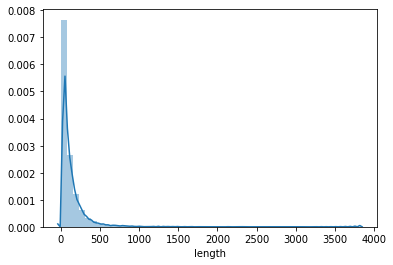

In [ ]:
# getting the length of the reviews
df['length']=df['review'].apply(len)
sns.distplot(df.length)

The average length of the reviews are well within 500 words

## Visualization showing the distibutions of the sentiments of each review

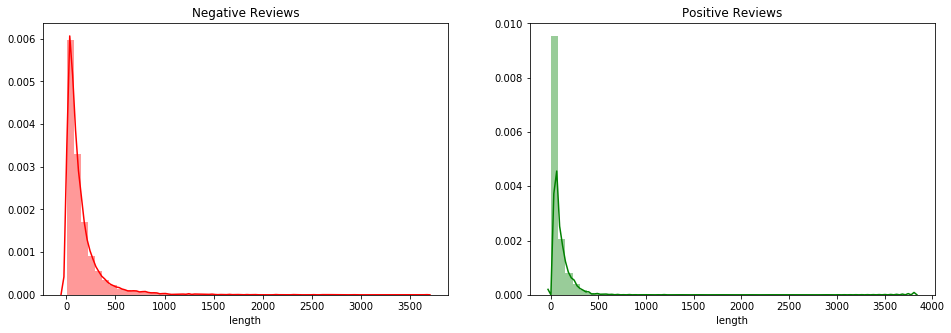

In [ ]:
fig,(ax1,ax2)=plt.subplots(ncols=2,nrows=1,figsize=(16,5))
sns.distplot(df[df.sentiment ==0].length, color='red',ax=ax1)
ax1.set_title('Negative Reviews')
sns.distplot(df[df.sentiment ==1].length, color='green',ax=ax2)
ax2.set_title('Positive Reviews')
plt.show()

## Average lenthgs of  the reviews when they are Positive and Bad

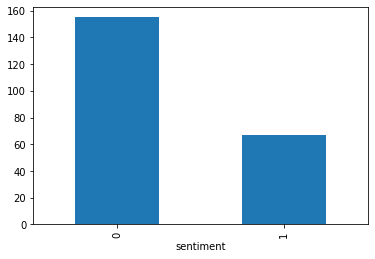

In [ ]:
grouped_df=df.groupby('sentiment')
grouped_df.length.mean().plot(kind='bar')

 It shows that coustomers write longer and detailed reviews when they not musch satisfied with the product 

## NLP analaysis

## Tokenizing the reviews

### first we need to convert the sentiments in array fomart into the list so we can tokenize them.

In [ ]:
reviews=list(df.review.values)
#converting into lower
reviews=[review.lower().split('.') for review in reviews]


In [ ]:
print(reviews[0:10])

[['good but need updates and improvements'], ['worst mobile i have bought ever, battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if i put mobile idle its getting discharged', 'this is biggest lie from amazon & lenove which is not at all expected, they are making full by saying that battery is 4000mah & booster charger is fake, it takes at least 4 to 5 hours to be fully charged', "don't know how lenovo will survive by making full of us", 'please don;t go for this else you will regret like me', ''], ['when i will get my 10% cash back', '', '', '', ' its already 15 january', '', ''], ['good'], ['the worst phone everthey have changed the last phone but the problem is still same and the amazon is not returning the phone ', 'highly disappointing of amazon'], ["only i'm telling don't buyi'm totally disappointedpoor batterypoor camerawaste of money"], ['phone is awesome', ' but while charging, it heats up allot', '', 'really a genuine reason to hate lenovo k8

### Tokenizing using word tokenziner of nltk package

In [ ]:
token=nltk.WhitespaceTokenizer()
review_tokens = [token.tokenize(review[0]) for review in reviews]
print(review_tokens[0:5])

[['good', 'but', 'need', 'updates', 'and', 'improvements'], ['worst', 'mobile', 'i', 'have', 'bought', 'ever,', 'battery', 'is', 'draining', 'like', 'hell,', 'backup', 'is', 'only', '6', 'to', '7', 'hours', 'with', 'internet', 'uses,', 'even', 'if', 'i', 'put', 'mobile', 'idle', 'its', 'getting', 'discharged'], ['when', 'i', 'will', 'get', 'my', '10%', 'cash', 'back'], ['good'], ['the', 'worst', 'phone', 'everthey', 'have', 'changed', 'the', 'last', 'phone', 'but', 'the', 'problem', 'is', 'still', 'same', 'and', 'the', 'amazon', 'is', 'not', 'returning', 'the', 'phone']]


### Perform parts-of-speech tagging on each sentence using the NLTK POS tagger.

In [ ]:
review_pos=[nltk.pos_tag(review) for review in review_tokens]
#review_pos=[nltk.pos_tag(review,tagset='universal') for review in review_tokens]
review_pos[0]

[('good', 'JJ'),
 ('but', 'CC'),
 ('need', 'VBP'),
 ('updates', 'NNS'),
 ('and', 'CC'),
 ('improvements', 'NNS')]

In [ ]:
#print(nltk.help.upenn_tagset())

### Extracting the nouns form the POS taged reviews as per problem satement

In [ ]:
review_nouns=[]
for n in review_pos:
    review_nouns.append([postag for postag in n if postag[1].startswith('NN')])
    #review_nouns.append([postag for postag in n if postag[1]=='NOUN'])
for n in range (10):
    print('Nouns in {} review --> {} \n'.format(n+1,review_nouns[n]))

Nouns in 1 review --> [('updates', 'NNS'), ('improvements', 'NNS')] 

Nouns in 2 review --> [('mobile', 'NN'), ('i', 'NN'), ('battery', 'NN'), ('hell,', 'NN'), ('backup', 'NN'), ('hours', 'NNS'), ('internet', 'NN'), ('uses,', 'NNS'), ('idle', 'NN')] 

Nouns in 3 review --> [('i', 'NN'), ('cash', 'NN')] 

Nouns in 4 review --> [] 

Nouns in 5 review --> [('phone', 'NN'), ('everthey', 'NN'), ('phone', 'NN'), ('problem', 'NN'), ('amazon', 'NN'), ('phone', 'NN')] 

Nouns in 6 review --> [("i'm", 'NN'), ("buyi'm", 'NN'), ('camerawaste', 'NN'), ('money', 'NN')] 

Nouns in 7 review --> [('phone', 'NN')] 

Nouns in 8 review --> [('battery', 'NN'), ('level', 'NN')] 

Nouns in 9 review --> [("it's", 'NN'), ('hitting', 'NN'), ('problems', 'NNS')] 

Nouns in 10 review --> [('lot', 'NN'), ('glitches', 'NNS'), ('thing', 'NN'), ('options', 'NNS')] 



## Lemmatize the words extarcted

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
review_lem=[]



In [ ]:
for review in review_nouns:
    review_lem.append([lemmatizer.lemmatize(postag[0],'n') for postag in review])
print( review_lem[0:10])

[['update', 'improvement'], ['mobile', 'i', 'battery', 'hell,', 'backup', 'hour', 'internet', 'uses,', 'idle'], ['i', 'cash'], [], ['phone', 'everthey', 'phone', 'problem', 'amazon', 'phone'], ["i'm", "buyi'm", 'camerawaste', 'money'], ['phone'], ['battery', 'level'], ["it's", 'hitting', 'problem'], ['lot', 'glitch', 'thing', 'option']]


## Removing the Stopwords and punctuation 

In [ ]:
from nltk.corpus import stopwords
from string import punctuation

clean_review=[]
stopwords=list(stopwords.words('english'))
punctuation=list(punctuation)

In [ ]:
for words in review_lem:
    clean_review.append([word for word in words if word not in (stopwords or punctuation)])

In [ ]:
print(clean_review[0:10])

[['update', 'improvement'], ['mobile', 'battery', 'hell,', 'backup', 'hour', 'internet', 'uses,', 'idle'], ['cash'], [], ['phone', 'everthey', 'phone', 'problem', 'amazon', 'phone'], ["i'm", "buyi'm", 'camerawaste', 'money'], ['phone'], ['battery', 'level'], ['hitting', 'problem'], ['lot', 'glitch', 'thing', 'option']]


## Preparing topic model using  LDA on the cleanned reviews

In [ ]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim 


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(clean_review)

# Filter out words that occur less than 10 documents, or more than 50% of the documents.
id2word.filter_extremes(no_below=10, no_above=0.5)

print (id2word)

# Create Corpus
texts= clean_review
print('Corpus \t',clean_review[0])


Dictionary(406 unique tokens: ['improvement', 'update', 'backup', 'battery', 'hour']...)
Corpus 	 ['update', 'improvement']


### WE have 406 words left after cleanning out most of the unrelated words for our analaysis
### And created an corpora in name of TEXT

#### Creating the Bag of Words(bos)

In [ ]:
print(id2word.token2id) #tokens with id 


{'improvement': 0, 'update': 1, 'backup': 2, 'battery': 3, 'hour': 4, 'internet': 5, 'mobile': 6, 'cash': 7, 'amazon': 8, 'phone': 9, 'problem': 10, "i'm": 11, 'money': 12, 'level': 13, 'lot': 14, 'option': 15, 'thing': 16, 'wrost': 17, 'charger': 18, 'damage': 19, 'month': 20, 'life': 21, 'purchase': 22, 'screen': 23, 'headset': 24, 'time': 25, 'card': 26, 'product': 27, 'range': 28, 'specification': 29, 'smartphone': 30, 'speaker': 31, 'camera': 32, 'speed': 33, 'cast': 34, 'wifi': 35, 'cable': 36, 'lenovo': 37, 'price': 38, 'function': 39, 'one': 40, 'performance': 41, 'r': 42, 'call': 43, 'disappointment': 44, 'signal': 45, 'quality': 46, 'rate': 47, 'min': 48, 'charge': 49, 'hr': 50, 'k8': 51, 'network': 52, 'memory': 53, 'superb': 54, 'value': 55, 'heating': 56, 'apps': 57, 'mobile,': 58, 'ok': 59, "can't": 60, 'charging': 61, 'tv': 62, 'work': 63, 'device': 64, 'usage': 65, 'ka': 66, 'mark,': 67, 'weight': 68, 'point': 69, 'issue': 70, 'system': 71, 'delivery': 72, 'week': 73, '

In [ ]:
#vector form of te above
review_bos=[id2word.doc2bow(text) for text in texts]# creating an vector represtation of the above i,e; craeting bos
print(review_bos)

[[(0, 1), (1, 1)], [(2, 1), (3, 1), (4, 1), (5, 1), (6, 1)], [(7, 1)], [], [(8, 1), (9, 3), (10, 1)], [(11, 1), (12, 1)], [(9, 1)], [(3, 1), (13, 1)], [(10, 1)], [(14, 1), (15, 1), (16, 1)], [(17, 1)], [(9, 1), (18, 1), (19, 1), (20, 1)], [(21, 1), (22, 1)], [(3, 1), (10, 2), (20, 1)], [(2, 1), (9, 1), (23, 1)], [(24, 1)], [(25, 1)], [(9, 1), (26, 1), (27, 1), (28, 1), (29, 1)], [(3, 1)], [(30, 1)], [], [(9, 1), (10, 1), (31, 1)], [(32, 1), (33, 1)], [(27, 1)], [(27, 1), (32, 1)], [(15, 1), (34, 1), (35, 1)], [(9, 1), (36, 1)], [(6, 1), (9, 1), (37, 1), (38, 1)], [(29, 1), (39, 1)], [], [(9, 1)], [(1, 1)], [(40, 1)], [(3, 1), (41, 1)], [(2, 1), (9, 1), (32, 1)], [(9, 1)], [(41, 1)], [(41, 1)], [(42, 1)], [(10, 2), (28, 1), (43, 1), (44, 1), (45, 1)], [(9, 1), (32, 1), (46, 1), (47, 1)], [], [(27, 1)], [(6, 1), (38, 1)], [(48, 1)], [(9, 1)], [], [(9, 1), (49, 1), (50, 1), (51, 1)], [(10, 1), (32, 1), (41, 1), (46, 1), (51, 1), (52, 1)], [(9, 1)], [(41, 1), (53, 1)], [(54, 1)], [(12, 1),

In [ ]:
print('Number of unique tokens: %d' % len(id2word))
print('Number of documents: %d' % len(review_bos))

Number of unique tokens: 406
Number of documents: 14675


In [ ]:
# Build LDA model with 12 Topics 
maxv=0
maxrs=0
from gensim.models import LdaModel

for rs in range(1,30):
    
    lda_model = LdaModel(corpus=review_bos,id2word=id2word,
                num_topics=12,random_state=rs,passes=20,iterations=15)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=clean_review, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    
    print ('Coherence Score:{} RS: {}'.format(coherence_lda,rs))
    if coherence_lda > maxv:
            maxv = coherence_lda
            maxrs = rs 
            
#print ("The ideal coherence score {:.4f} corresponds to random state {} ".format(maxv,maxrs))


Coherence Score:0.5083919657696322 RS: 1
Coherence Score:0.5254187672082519 RS: 2
Coherence Score:0.476476041334444 RS: 3
Coherence Score:0.4730361159660301 RS: 4
Coherence Score:0.49627736930757965 RS: 5
Coherence Score:0.5035075494053166 RS: 6
Coherence Score:0.5009781472790498 RS: 7
Coherence Score:0.5064013010911522 RS: 8
Coherence Score:0.4907097048934452 RS: 9
Coherence Score:0.4880634164343027 RS: 10
Coherence Score:0.4679983371161482 RS: 11
Coherence Score:0.49411420608488804 RS: 12
Coherence Score:0.5105332928777638 RS: 13
Coherence Score:0.49439372940435494 RS: 14
Coherence Score:0.5007769963349165 RS: 15
Coherence Score:0.5186271692036467 RS: 16
Coherence Score:0.4866915755432076 RS: 17
Coherence Score:0.48034486664583453 RS: 18
Coherence Score:0.49445017869247776 RS: 19
Coherence Score:0.5044207620649602 RS: 20
Coherence Score:0.49327247428275084 RS: 21
Coherence Score:0.4802056547738122 RS: 22
Coherence Score:0.5075621553049546 RS: 23
Coherence Score:0.48536164118150865 RS

In [ ]:
print ("The ideal coherence score {:.4f} corresponds to random state {} ".format(maxv,maxrs))


The ideal coherence score 0.5254 corresponds to random state 2 


In [ ]:
result_df = pd.DataFrame({'No of topics': [12], 'Best Random State ': [maxrs] , ' Coherence Score': [maxv]})
result_df.style.hide_index()

No of topics,Best Random State,Coherence Score
12,17,0.525419


 The above is the best coherence score is at random state for 12 topics
 lets build a model using this parameters

In [ ]:
lda_model = LdaModel(corpus=review_bos,id2word=id2word,
                num_topics=12,random_state=2,passes=20,iterations=15)
coherence_model_lda = CoherenceModel(model=lda_model, texts=clean_review, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
    
print ('Coherence Score:{} RS: {}'.format(coherence_lda,2))

Coherence Score:0.5254187672082519 RS: 2


In [ ]:
#Print the Keyword in the 12 topics
from pprint import pprint
pprint (lda_model.print_topics())
#The below weights include the top terms for each topic


[(0,
  '0.233*"issue" + 0.110*"network" + 0.071*"service" + 0.057*"problem" + '
  '0.053*"amazon" + 0.047*"sim" + 0.034*"video" + 0.031*"support" + '
  '0.029*"music" + 0.024*"jio"'),
 (1,
  '0.245*"price" + 0.185*"feature" + 0.093*"range" + 0.069*"everything" + '
  '0.045*"super" + 0.043*"glass" + 0.034*"usage" + 0.029*"piece" + '
  '0.023*"gorilla" + 0.019*"product,"'),
 (2,
  '0.105*"heat" + 0.072*"delivery" + 0.071*"update" + 0.070*"software" + '
  '0.053*"please" + 0.051*"look" + 0.049*"smartphone" + 0.046*"purchase" + '
  '0.034*"return" + 0.030*"headphone"'),
 (3,
  '0.221*"problem" + 0.116*"day" + 0.104*"heating" + 0.070*"screen" + '
  '0.058*"call" + 0.039*"work" + 0.037*"use" + 0.034*"option" + 0.025*"volta" '
  '+ 0.025*"week"'),
 (4,
  '0.264*"camera" + 0.252*"battery" + 0.123*"quality" + 0.059*"backup" + '
  '0.033*"performance" + 0.029*"life" + 0.020*"mode" + 0.016*"mark" + '
  '0.013*"card" + 0.012*"depth"'),
 (5,
  '0.177*"month" + 0.111*"device" + 0.084*"charge" + 0.05

In [ ]:
print('\nPerplexity: ', lda_model.log_perplexity(review_bos)) 


Perplexity:  -5.0435807887740935


# Visualize the 12 topics keywords and their top terms from visualization

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model,review_bos, id2word)
vis

C:\Users\abhil\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.308538 -0.115156       1        1  14.819047
7     -0.040667  0.068876       2        1  12.027387
3     -0.201319 -0.266488       3        1   9.309412
10     0.073528  0.029656       4        1   9.037844
0     -0.211139 -0.236804       5        1   7.997670
11     0.302352 -0.123814       6        1   7.831615
6     -0.072824  0.193084       7        1   7.601766
1     -0.030441  0.069583       8        1   7.127076
8     -0.024350  0.070280       9        1   6.641719
9     -0.042842  0.211217      10        1   5.969388
2     -0.033549  0.064783      11        1   5.958675
5     -0.027287  0.034783      12        1   5.678405, topic_info=    Category         Freq     Term        Total  loglift  logprob
9    Default  3434.000000    phone  3434.000000  30.0000  30.0000
27   Default  1491.000000  product  1491.000000  29.0000  29.0000
6    Default  1199.000000   mobile  1199.000000  28.0000  28.0000
32   Default  1229.000000   camera  1229.000000  27.0000  27.0000
3    Default  1392.000000  battery  1392.000000  26.0000  26.0000
..       ...          ...      ...          ...      ...      ...
86   Topic12    11.623693   anyone    12.548130   2.7920  -5.0344
162  Topic12    11.466581    think    12.391014   2.7910  -5.0480
120  Topic12    21.596954    touch    35.841637   2.3619  -4.4149
53   Topic12    18.940346   memory    34.836639   2.2591  -4.5461
261  Topic12    17.893860      cam    31.021152   2.3183  -4.6030

[438 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
134       7  0.944717         a1
8         5  0.792936     amazon
8         7  0.202705     amazon
291       1  0.930067     amount
321       4  0.980413    android
...     ...       ...        ...
179      10  0.982475      worth
17        8  0.919495      wrost
131       5  0.972149         ye
90       12  0.966989       year
328       1  0.930611  yesterday

[395 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 8, 4, 11, 1, 12, 7, 2, 9, 10, 3, 6])

## Topics through business lens

#### Topics : '0', '1' , '3' ,  can be combined to as they describe about HardWare Issues**
#### Topics : '4' ,'5'--->  Software Issuses and Connectivity 
#### Topics : '6','12' --> doesn't shed enough light to the issues
#### Topics : '10','11'---> Battery Heating issue
#### Topics : '7','8' --> Positive talks


## Creating model to find an optimal no of topics for the review token extracted

In [ ]:
maxvs = 0
maxnt = 0
maxrs = 0

for rs in range(1,40):
    for nt in range(2,15):
        
        model_2 = LdaModel(corpus=review_bos,id2word=id2word,num_topics=nt,random_state=rs,
                      passes=10,iterations=20,per_word_topics=True)
        coherence_model_lda_2 = CoherenceModel(model=model_2, texts=clean_review, dictionary=id2word, coherence='c_v')
        coherence_lda_2 = coherence_model_lda_2.get_coherence()
        
        print('Conherence {} for RandomState : {} , No of Topics : {} '.format(coherence_lda_2,rs,nt))
        
        if coherence_lda_2 > maxvs:
            maxvs=coherence_lda_2
            maxrs=rs
            maxnt=nt
            
print('Idel no of topics from the model is {:.4f} at Randaom State {} with C_V of :{} '.format(maxnt,maxrs,maxvs))

Conherence 0.23334116722785825 for RandomState : 1 , No of Topics : 2 
Conherence 0.3373681713709262 for RandomState : 1 , No of Topics : 3 
Conherence 0.3510231255667889 for RandomState : 1 , No of Topics : 4 
Conherence 0.3881914343783445 for RandomState : 1 , No of Topics : 5 
Conherence 0.39108626750487924 for RandomState : 1 , No of Topics : 6 
Conherence 0.41526380737514 for RandomState : 1 , No of Topics : 7 
Conherence 0.44411616488104283 for RandomState : 1 , No of Topics : 8 
Conherence 0.45894481552386945 for RandomState : 1 , No of Topics : 9 
Conherence 0.4707256010940135 for RandomState : 1 , No of Topics : 10 
Conherence 0.4813485611454263 for RandomState : 1 , No of Topics : 11 
Conherence 0.515087395054933 for RandomState : 1 , No of Topics : 12 
Conherence 0.5319601291407904 for RandomState : 1 , No of Topics : 13 
Conherence 0.5165064919349295 for RandomState : 1 , No of Topics : 14 
Conherence 0.2715145019755621 for RandomState : 2 , No of Topics : 2 
Conherence 0.3

Conherence 0.4905531010706422 for RandomState : 9 , No of Topics : 14 
Conherence 0.24443592046261717 for RandomState : 10 , No of Topics : 2 
Conherence 0.29379796687003173 for RandomState : 10 , No of Topics : 3 
Conherence 0.35694052642843754 for RandomState : 10 , No of Topics : 4 
Conherence 0.35393829339149113 for RandomState : 10 , No of Topics : 5 
Conherence 0.3729668395334127 for RandomState : 10 , No of Topics : 6 
Conherence 0.4286877036220603 for RandomState : 10 , No of Topics : 7 
Conherence 0.4144968822552326 for RandomState : 10 , No of Topics : 8 
Conherence 0.4509931434187782 for RandomState : 10 , No of Topics : 9 
Conherence 0.4531565562346441 for RandomState : 10 , No of Topics : 10 
Conherence 0.500614093357031 for RandomState : 10 , No of Topics : 11 
Conherence 0.4939489872899328 for RandomState : 10 , No of Topics : 12 
Conherence 0.4858386819653324 for RandomState : 10 , No of Topics : 13 
Conherence 0.5118467259163547 for RandomState : 10 , No of Topics : 14

Conherence 0.4797820580489767 for RandomState : 18 , No of Topics : 12 
Conherence 0.5183096075839243 for RandomState : 18 , No of Topics : 13 
Conherence 0.5242522222625009 for RandomState : 18 , No of Topics : 14 
Conherence 0.28522035361062414 for RandomState : 19 , No of Topics : 2 
Conherence 0.28513125166487246 for RandomState : 19 , No of Topics : 3 
Conherence 0.3698743841279585 for RandomState : 19 , No of Topics : 4 
Conherence 0.3955403152307464 for RandomState : 19 , No of Topics : 5 
Conherence 0.39589541167781334 for RandomState : 19 , No of Topics : 6 
Conherence 0.39615196344299036 for RandomState : 19 , No of Topics : 7 
Conherence 0.43001333122792657 for RandomState : 19 , No of Topics : 8 
Conherence 0.42395618769388305 for RandomState : 19 , No of Topics : 9 
Conherence 0.44963513094574814 for RandomState : 19 , No of Topics : 10 
Conherence 0.4576405484334725 for RandomState : 19 , No of Topics : 11 
Conherence 0.4861820225862001 for RandomState : 19 , No of Topics

Conherence 0.45952059950282276 for RandomState : 27 , No of Topics : 10 
Conherence 0.47964325201364894 for RandomState : 27 , No of Topics : 11 
Conherence 0.49768908741692447 for RandomState : 27 , No of Topics : 12 
Conherence 0.4888279931609233 for RandomState : 27 , No of Topics : 13 
Conherence 0.52890003525389 for RandomState : 27 , No of Topics : 14 
Conherence 0.27012750391077023 for RandomState : 28 , No of Topics : 2 
Conherence 0.32872551127412253 for RandomState : 28 , No of Topics : 3 
Conherence 0.3796504575830444 for RandomState : 28 , No of Topics : 4 
Conherence 0.3724024482210992 for RandomState : 28 , No of Topics : 5 
Conherence 0.3973382975818918 for RandomState : 28 , No of Topics : 6 
Conherence 0.41014207733725744 for RandomState : 28 , No of Topics : 7 
Conherence 0.4426071125101111 for RandomState : 28 , No of Topics : 8 
Conherence 0.46631417553257914 for RandomState : 28 , No of Topics : 9 
Conherence 0.46821851304496426 for RandomState : 28 , No of Topics 

Conherence 0.39980796620743264 for RandomState : 36 , No of Topics : 8 
Conherence 0.42062878886426397 for RandomState : 36 , No of Topics : 9 
Conherence 0.4517792097796918 for RandomState : 36 , No of Topics : 10 
Conherence 0.46976059109499035 for RandomState : 36 , No of Topics : 11 
Conherence 0.4913617354143425 for RandomState : 36 , No of Topics : 12 
Conherence 0.5085981576124662 for RandomState : 36 , No of Topics : 13 
Conherence 0.5073567402604171 for RandomState : 36 , No of Topics : 14 
Conherence 0.249591131506741 for RandomState : 37 , No of Topics : 2 
Conherence 0.30169642326008983 for RandomState : 37 , No of Topics : 3 
Conherence 0.3668468157446809 for RandomState : 37 , No of Topics : 4 
Conherence 0.36618059195379093 for RandomState : 37 , No of Topics : 5 
Conherence 0.35242996545976585 for RandomState : 37 , No of Topics : 6 
Conherence 0.38559511232141697 for RandomState : 37 , No of Topics : 7 
Conherence 0.4055797944495404 for RandomState : 37 , No of Topics 

In [ ]:
#Conherence 0.5319601291407904 for RandomState : 1 , No of Topics : 13 
#Conherence 0.5270337118880032 for RandomState : 2 , No of Topics : 14 
#Conherence 0.5263572506664229 for RandomState : 5 , No of Topics : 14 
#Conherence 0.5424792888578882 for RandomState : 7 , No of Topics : 14 
#Conherence 0.49714439032277846 for RandomState : 6 , No of Topics : 11
#Conherence 0.48251777958802766 for RandomState : 7 , No of Topics : 10
#Conherence 0.5041377562609682 for RandomState : 16 , No of Topics : 12 
#Conherence 0.4830898148101635 for RandomState : 17 , No of Topics : 9 

#### The best no of topics from bove itterations according to me should be 10 or 11 , tough 13 ,14 show higher coherance, we saw that in 12 topics it self there wasn't much info in some of the topics extarcted

In [ ]:
LDA_model=LdaModel(corpus=review_bos,id2word=id2word,num_topics=9,
             random_state=17,passes=15,iterations=3,per_word_topics=True)
LDA_coherence=CoherenceModel(model=LDA_model,texts=clean_review,dictionary=id2word, coherence='c_v')
coherence_score=LDA_coherence.get_coherence()

print('The Conherance C_V is {:.4} for {} no of topics  at radom state {}'.format(coherence_score,9,17))

The Conherance C_V is 0.4989 for 9 no of topics  at radom state 17


In [ ]:
maxrs = 17
no_t = 9
result_df = pd.DataFrame({'No of topics': [no_t], 'Best Random State ': [maxrs] , ' Coherence Score': [coherence_score]})
result_df.style.hide_index()

No of topics,Best Random State,Coherence Score
9,17,0.498865


In [ ]:
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim.prepare(LDA_model,review_bos,id2word)
vis

C:\Users\abhil\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.342660  0.127437       1        1  16.011684
0      0.195482  0.291995       2        1  14.806355
4      0.040035 -0.242938       3        1  12.526446
1      0.026963 -0.139793       4        1  11.991348
3      0.038243 -0.114109       5        1   9.822279
2      0.018584 -0.148508       6        1   9.167052
5     -0.220419  0.060795       7        1   9.118397
7      0.136758  0.098741       8        1   8.984411
8      0.107015  0.066380       9        1   7.572028, topic_info=    Category         Freq      Term        Total  loglift  logprob
9    Default  3515.000000     phone  3515.000000  30.0000  30.0000
27   Default  1573.000000   product  1573.000000  29.0000  29.0000
6    Default  1136.000000    mobile  1136.000000  28.0000  28.0000
32   Default  1303.000000    camera  1303.000000  27.0000  27.0000
3    Default  1415.000000   battery  1415.000000  26.0000  26.0000
..       ...          ...       ...          ...      ...      ...
123   Topic9    31.319473  battery,    32.205429   2.5528  -4.3310
47    Topic9    28.732168      rate    29.618061   2.5503  -4.4172
24    Topic9    28.649612   headset    29.535444   2.5503  -4.4201
290   Topic9    27.932905      jack    28.818840   2.5495  -4.4454
241   Topic9    27.588772      core    28.474661   2.5491  -4.4578

[306 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
8         1  0.994453       amazon
321       4  0.992281      android
263       8  0.980724          app
245       2  0.985185  application
57        1  0.970074         apps
...     ...       ...          ...
362       8  0.977651         word
63        3  0.987222         work
179       5  0.991250        worth
90        6  0.965466         year
328       6  0.976903    yesterday

[277 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 1, 5, 2, 4, 3, 6, 8, 9])

### a. Name each of the identified topics.

### b. Create a table with the topic name and the top 10 terms in each to present to the  business
   

In [ ]:
topics=LDA_model.show_topics(formatted=False)
topics

[(0,
  [('battery', 0.30386594),
   ('problem', 0.16116351),
   ('issue', 0.11749255),
   ('heating', 0.06226815),
   ('backup', 0.060860317),
   ('network', 0.055654302),
   ('device', 0.033521615),
   ('lot', 0.017315976),
   ('h', 0.016107192),
   ('bit', 0.011844863)]),
 (1,
  [('note', 0.15092278),
   ('lenovo', 0.1188589),
   ('k8', 0.1023724),
   ('day', 0.09269404),
   ('charger', 0.053679917),
   ('sound', 0.035410564),
   ('experience', 0.034605768),
   ('turbo', 0.02635747),
   ('smartphone', 0.02184812),
   ('charging', 0.019570775)]),
 (2,
  [('mobile', 0.39389864),
   ('price', 0.18176794),
   ('screen', 0.09121415),
   ('range', 0.06916153),
   ('budget', 0.0451149),
   ('headphone', 0.017634604),
   ('photo', 0.016055191),
   ('r', 0.01582267),
   ('class', 0.015679348),
   ('sale', 0.014659163)]),
 (3,
  [('money', 0.09816713),
   ('month', 0.08861359),
   ('everything', 0.049513273),
   ('charge', 0.04222779),
   ('value', 0.041036345),
   ('update', 0.039679546),
   

In [ ]:
issues=['Battery perfomance','Features and Details','Value for Money','Software','Hardware','Misc','Amazon','Overall Performance','latest Tech support']

In [ ]:
top_terms=[]
topic_id=[1+t[0] for t in topics]
for topic in topics:
    top_terms.append([term[0] for term in topic[1]])
                     
topic_df = pd.DataFrame({'Topic ID': topic_id, 'Top Terms':top_terms})

In [ ]:
topic_df.insert(1,'Issues',issues)

In [ ]:
topic_df
topic_df.style.hide_index()


Topic ID,Issues,Top Terms
1,Battery perfomance,"['battery', 'problem', 'issue', 'heating', 'backup', 'network', 'device', 'lot', 'h', 'bit']"
2,Features and Details,"['note', 'lenovo', 'k8', 'day', 'charger', 'sound', 'experience', 'turbo', 'smartphone', 'charging']"
3,Value for Money,"['mobile', 'price', 'screen', 'range', 'budget', 'headphone', 'photo', 'r', 'class', 'sale']"
4,Software,"['money', 'month', 'everything', 'charge', 'value', 'update', 'software', 'speed', 'please', 'mark']"
5,Hardware,"['camera', 'quality', 'performance', 'speaker', 'handset', 'work', 'glass', 'video', 'excellent', 'front']"
6,Misc,"['product', 'heat', 'hai', 'delivery', 'super', 'ho', 'hang', 'set', 'product,', 'k']"
7,Amazon,"['phone', 'call', 'amazon', 'service', 'superb', 'cast', 'look', 'support', 'purchase', 'apps']"
8,Overall Performance,"['feature', 'time', 'waste', 'life', 'display', 'hour', 'use', 'mode', 'drain', 'box']"
9,latest Tech support,"['phone,', 'sim', 'option', 'awesome', 'ok', 'processor', 'thing', 'music', 'week', 'card']"


# Conclusion: 

## POS Tagging , topic modelling using LDA and topic interpretation has been successfully completed.\
## LDA optimal model with 9 topics and their top 10 relevant terms have been extracted